In [148]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

Сгенерируйте выборку 𝑋1, ..., 𝑋𝑁 из стандартного нормального распределения для 𝑁 = 10^4

In [149]:
N = 10000
samples = sts.norm.rvs(size=N, loc=0, scale=1)

Для всех 𝑛 <= 𝑁 посчитайте по ней эмпирическую функцию распределения.
Для некоторых 𝑛 постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки “скачков” кривых), нанеся на каждый из них истинную функцию распределения.

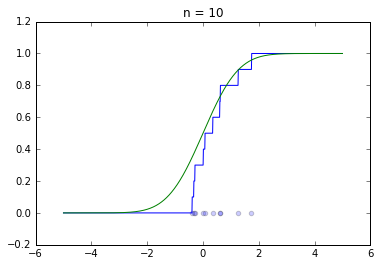

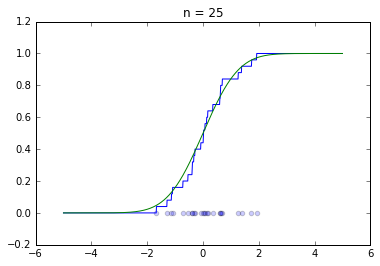

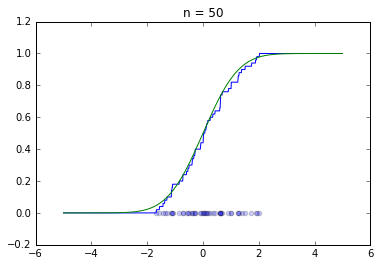

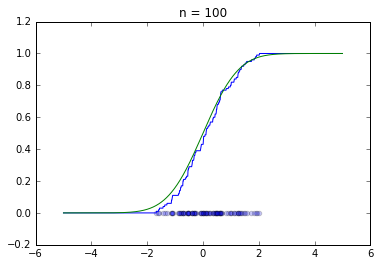

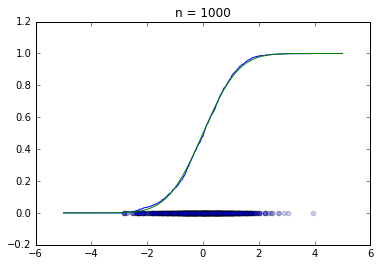

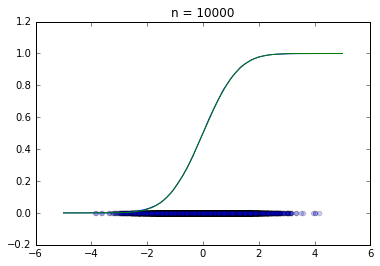

In [150]:
distfun = []
for n in range(1, N + 1):
    distfun.append(ECDF(samples[:n]))
#n = [1, 2, 3, 4, 5, 10]
n = [10, 25, 50, 100, 1000, N]
for k in n:
    grid = np.linspace(-5, 5, 1000)
    plt.scatter(samples[:k], np.zeros(k), alpha = 0.2)
    plt.plot(grid, distfun[k - 1](grid))
    plt.plot(grid, sts.norm.cdf(grid))
    plt.title("n = " + str(k))
    plt.show()

In [ ]:
sup = []
for n in range(1, N + 1):
    a = []
    temp_samples = np.sort(samples[:n], kind='quicksort')
    for i in range(n):
        a.append(distfun[n - 1](temp_samples[i]) - sts.norm.cdf(temp_samples[i]))
        if i > 0: a.append(distfun[n - 1](temp_samples[i - 1]) - sts.norm.cdf(temp_samples[i]))
        if i == 0: a.append(sts.norm.cdf(temp_samples[i]))
    a = np.abs(np.array(a))
    #print a
    sup.append(np.max(a))
#print sup
x = np.arange(N) + 1
plt.plot(x, sup)
plt.ylim([0., 0.1])
plt.show()